### Pattern Within a Pattern

Enter size of the square:  4


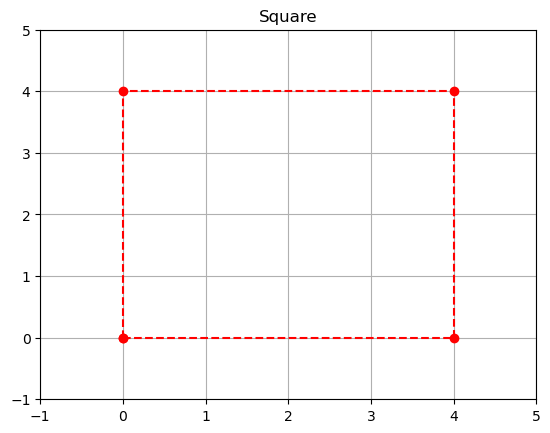

In [7]:
import matplotlib.pyplot as plt
def square(x, y):
    '''
    Objective: To plot a square
    Input Parameter: x, y - lists of z coordinates and y coordinates respectively
    Return Value: None
    '''
    plt.plot(x, y, 'ro--')
def main():
    '''
    Objective: To plot a square based on user input
    Input Parameter: None
    Return Value: None
    '''
    size = int(input("Enter size of the square: "))
    x = [0, size, size, 0, 0]
    y = [0, 0, size, size, 0]
    square(x, y)
    plt.title('Square')
    plt.axis([min(x)-1, max(x)+1, min(y)-1, max(y)+1])
    plt.grid()
    plt.show()
if __name__ == "__main__":
    main()

Enter size of outer square:  4


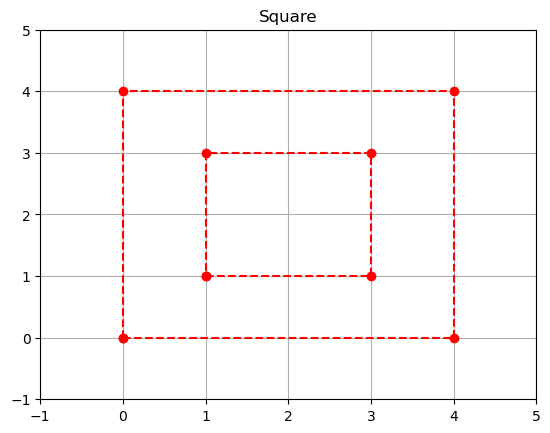

In [17]:
import matplotlib.pyplot as plt
def square(x, y):
    '''
    Objective: To plot a square
    Input Parameter: x, y - list of coordinates
    Return Value: None
    '''
    if (x[1]-x[0]>=1):
        plt.plot(x, y, 'ro--')
        x = [x[0]+1, x[1]-1, x[2]-1, x[3]+1, x[0]+1]
        y = [y[0]+1, y[1]+1, y[2]-1, y[3]-1, y[0]+1]
        square(x, y)
def squareWrapper(size):
    '''
    Objective: To define wrapper function for function square
    Input Parameter: size - numeric value
    Return Value: None
    '''
    x = [0, size, size, 0, 0]
    y = [0, 0, size, size, 0]
    square(x, y)
    plt.title("Square")
    plt.axis([min(x)-1, max(x)+1, min(y)-1, max(y)+1])
    plt.grid()
    plt.show()
def main():
    '''
    Objecive: To print squares within squares based on user input
    Input Parameter: None
    Return Value: None
    '''
    size = int(input("Enter size of outer square: "))
    squareWrapper(size)
if __name__ == "__main__":
    main()

### Generalized Eight Queens Problem

In [11]:
class Queens:
    '''
    objective: To solve n-queens problem
    '''
    def __init__(self, size):
        '''
        Objective: To initialize object of class Queens
        Input Parameters:
            self (implicit parameter) - object of type Queens
            size - numeric
        Return Value: None
        '''
        # Dimension of board = Max. no. of Queens
        self.boardSize = size
        # the count for queen as well row no. on the chessboard
        self.count = 0
        # The Queens object is set up as an empty configuration
        # on a chessboard with boardSize = boardSize squares
        self.board = [[False for i in range (self.boardSize)] for j in range(self.boardSize)]
    def getBoardSize(self):
        '''
        Objective: To determine size of chess voard
        Input Parameter: self (implicit parameter) - object of type Queens
        Return Value: boardSize - numeric
        '''
        return self.boardSize
    def __str__(self):
        '''
        objective: To return string representation of object of type Queens
        Input Parameter: self (implicit parameter) - object of type Queens
        Return Value: string
        '''
        result = ''
        for i in self.board:
            for j in i:
                if j == False:
                    result += '-' + ' '
                else:
                    result += 'Q' + ' '
            result += '\n'
        return result
    def unguarded(self, col):
        '''
        Objective: To determine whether the current chessboard square is safe i.e. not guarded by any other queen
        Input Parameters:
            self (implicit parameter) - object of type Queens
            col - numeric
        Return Value: True or False - boolean
        '''
        ok = True # turns False if we find a queen in column or diagonal
        i = 0
        # Check upper part of column
        while(ok and i<self.count):
            ok = not(self.board[i][col])
            i += 1
        i = 1
        # Check upper-left Diagonal
        while(ok and self.count-1 >= 0 and col-i >= 0):
            ok = not(self.board[self.count-i][col-i])
            i += 1
        i = 1
        # Check upper-right Diagonal
        while(ok and self.count-1 >= 0 and col + i < self.boardSize):
            ok = not(self.board[self.count-i][col+i])
            i += 1
        return ok
    def add(self, col):
        '''
        Objective: To add the queen at the given column to
        Input Parameters:
            self (implicit parameter) - object of type Queens
            col - numeric
        Return Value: None
        '''
        '''
        PreCondition - The square in the first unoccupied row (row count) and column col is not guarded by any queen
        '''
        self.board[self.count][col] = True
        self.count += 1
    def remove(self, col):
        '''
        Objective: To remove the queen from the given column no.
        Input Parameter: self (implicit parameter) - object of type Queens
        col - numeric
        Return Value: None
        '''
        '''
        PreCondition - There is a queen in the square in row count -1 and column col
        '''
        self.board[self.count - 1][col] = False
        self.count -= 1
    def isSolved(self):
        '''
        Objective: To determine whether the current chessboard configuration is fully or partially completed
        Input Parameter: self (implicit parameter) - object of type Queens
        Return Value: True or False - boolean
        '''
        if self.count == self.boardSize:
            return True
        else:
            return False
solNum = 0
def solveFrom(configuration):
    '''
    Objective: To find solutioons to n-Queens problem
    Input Parameter: configuration - object of type Queens
    Return Value: None
    '''
    '''
    PostCondition: All n-queens solutions that extend the given configuration are printed.
    The configuration is restored to its initial state.
    '''
    global solNum
    if (configuration.isSolved()):
        solNum += 1
        print("Solution No. ", solNum)
        print(configuration)
    else:
        for col in range(0, configuration.getBoardSize()):
            if configuration.unguarded(col):
                configuration.add(col)
                solveFrom(configuration) # Recursively continue to add queens
                configuration.remove(col)
def nQueens():
    '''
    Objective: To find solutions to n-Queens problem
    Input Parameter: None
    Return Value: None
    '''
    boardSize = int(input("Enter board size: "))
    print(boardSize, "-Queens Problem")
    print("The board has", boardSize, "rows and", boardSize, "columns.")
    configuration = Queens(boardSize)
    solveFrom(configuration)
def main():
    '''
    Objective: To find solutions to n-Queens problem
    Input Parameter: None
    Return Value: None
    '''
    nQueens()
if __name__ == "__main__":
    main()

Enter board size:  8


8 -Queens Problem
The board has 8 rows and 8 columns.
Solution No.  1
Q - - - - - - - 
- - - - Q - - - 
- - - - - - - Q 
- - - - - Q - - 
- - Q - - - - - 
- - - - - - Q - 
- Q - - - - - - 
- - - Q - - - - 

Solution No.  2
Q - - - - - - - 
- - - - - Q - - 
- - - - - - - Q 
- - Q - - - - - 
- - - - - - Q - 
- - - Q - - - - 
- Q - - - - - - 
- - - - Q - - - 

Solution No.  3
Q - - - - - - - 
- - - - - - Q - 
- - - Q - - - - 
- - - - - Q - - 
- - - - - - - Q 
- Q - - - - - - 
- - - - Q - - - 
- - Q - - - - - 

Solution No.  4
Q - - - - - - - 
- - - - - - Q - 
- - - - Q - - - 
- - - - - - - Q 
- Q - - - - - - 
- - - Q - - - - 
- - - - - Q - - 
- - Q - - - - - 

Solution No.  5
- Q - - - - - - 
- - - Q - - - - 
- - - - - Q - - 
- - - - - - - Q 
- - Q - - - - - 
Q - - - - - - - 
- - - - - - Q - 
- - - - Q - - - 

Solution No.  6
- Q - - - - - - 
- - - - Q - - - 
- - - - - - Q - 
Q - - - - - - - 
- - Q - - - - - 
- - - - - - - Q 
- - - - - Q - - 
- - - Q - - - - 

Solution No.  7
- Q - - - - 

### Knight's Tour Problem

In [ ]:
class Knight:
    '''
    Objective: To find solutions to Knight's Tour problem
    '''
    def __init__(self, size):
        '''
        Objective: To initialize object of class Knight
        Input Parameters:
            self (implicit parameter) - object of type Knight
            size - numberic
        Return Value: None
        '''
        # Dimension of board
        self.boardSize = size
        # Specifies the number of moves taken by the Knight
        self.moveNum = 0
        # Total number of Knight's tour explored
        self.solNum = 0
        # Initialize all the squares on the chessboard with value 0 to mark them as untraversed.
        # Keeps track of history of succesive moves
        # if board[x, y] = 0
        # if board[x, y] = i
        self.board = [[0 for i in range(size)] for j in range(size)]
        # Relative moves possible from the current position
        self.moves = [(2,1), (1,2), (-1, 2), (-2, 1), (-2, -1), (-1, -2), (1, -2), (2, -1)]
    def getBoardSize(self):
        '''
        Objective: To determine size of chessboard
        Input Parameter: self (implicit parameter) - object of type Knight
        Return Value: boardSize - numeric
        '''
        return self.boardSize
    def __str__(self):
        '''
        Objective: To return string representation of object of type Knight
        Input Parameter: self (implicit parameter) - object of type Knight
        Return Value: string
        '''
        result = ''
        for i in range(self.boardSize):
            for j in range(self.boardSize):
                result += str(self.board[i][j]) + '\t'
            result += '\n'
        return result
    def possible(self, xyPos):
        '''
        Objective: To determine whether the move to position xyPos is possible
        Input Parameters:
            self (implicit parameter) - object of type Knight
            xyPos - tuple of numeric data
        Return Value: True or False - Boolean
        '''
        x, y = xyPos[0], xyPos[1]
        if x >= 0 and x < self.boardSize and y >= 0 and y < self.boardSize and self.board[x][y] == 0:
            return True
        else:
            return False
    def add(self, xyPos):
        '''
        Objective: To place the Knight to given chessboard position
        Input Parameters:
            self (implicit parameter) - object of type Knight
            xyPos - tuple of numeric data
        Return Value: None
        '''
        x, y = xyPos[0], xyPos[1]
        self.moveNum +=1
        self.board[x][y] = self.moveNum
    def remove(self, xyPos):
        '''
        Objective: To remove the Knight from given chessboard position.
        Input Parameters:
            self (implicit parameter) - object of type Knight
            xyPos - tuple of numeric data
        Return Value: None
        '''
        x, y = xyPos[0], xyPos[1]
        self.board[x][y] = 0
        self.moveNum -= 1
    def moveFurther(self, xyPos):
        '''
        Objective: To determine next sequence of moves if the current configuration is not completed.
        Input parameters:
            self (implicit parameter) - object of type Knight
            xyPos - tuple of numberic data
        Return Value: None
        '''
        '''
        PostCondition: All knight's tour solutions for the given configuration are printed
        The configuration is restored to its initial state.
        '''
        x, y = xyPos[0], xyPos[1]
        if (self.isSolved()):
            self.solNum += 1
            print("Solution Number: ", self.solNum)
            print(self)
            return
        for (dx, dy) in self.moves:
            # Select candidate for the next sequence of moves
            newMove = (x + dx, y + dy)
            if self.possible(newMove):
                self.add(newMove)
                self.moveFurther(newMove)
                self.remove(newMove)
    def isSolved(self):
        '''
        Objective: To determine whether the current chessboard configuration is fully or partially completed
        Input parameter: self (implicit parameter) - object of type Knight
        Return Value: True or False - boolean
        '''
        if self.moveNum == self.boardSize * self.boardSize:
            return True
        else:
            return False
def solveFrom(configuration):
    '''
    Objective: To find solutions to Knight's Tour problem
    Input Parameter: configuration - object of type Knighht
    Return Value: None
    '''
    for i in range(configuration.getBoardSize()):
        for j in range(configuration.getBoardSize()):
            configuration.add((i, j))
            configuration.moveFurther((i, j))
            configuration.remove((i, j))
def knightTour():
    '''
    Objective: To find solutions to Knight's Tour problem
    Input Parameter: None
    Return Value: None
    '''
    boardSize = int(input("Enter board size: "))
    print("The board has ", boardSize, " rows and ", boardSize, " columns.")
    configuration = Knight(boardSize)
    solveFrom(configuration)
def main():
    '''
    Objective: To find solutions to Knight's Tour problem
    Input Parameter: None
    Return Value: None
    '''
    knightTour()
if __name__ == "__main__":
    main()

Enter board size:  5


The board has  5  rows and  5  columns.
Solution Number:  1
1	6	15	10	21	
14	9	20	5	16	
19	2	7	22	11	
8	13	24	17	4	
25	18	3	12	23	

Solution Number:  2
1	6	11	18	21	
12	17	20	5	10	
7	2	15	22	19	
16	13	24	9	4	
25	8	3	14	23	

Solution Number:  3
1	6	11	16	21	
12	15	20	5	10	
7	2	13	22	17	
14	19	24	9	4	
25	8	3	18	23	

Solution Number:  4
1	6	17	12	21	
16	11	20	5	18	
7	2	9	22	13	
10	15	24	19	4	
25	8	3	14	23	

Solution Number:  5
1	12	17	6	21	
18	5	20	11	16	
13	2	9	22	7	
4	19	24	15	10	
25	14	3	8	23	

Solution Number:  6
1	16	11	6	21	
10	5	20	15	12	
17	2	13	22	7	
4	9	24	19	14	
25	18	3	8	23	

Solution Number:  7
1	18	11	6	21	
10	5	20	17	12	
19	2	15	22	7	
4	9	24	13	16	
25	14	3	8	23	

Solution Number:  8
1	10	15	6	21	
16	5	20	9	14	
11	2	7	22	19	
4	17	24	13	8	
25	12	3	18	23	

Solution Number:  9
1	16	5	10	21	
6	11	20	15	4	
19	2	17	22	9	
12	7	24	3	14	
25	18	13	8	23	

Solution Number:  10
1	12	5	18	21	
6	17	20	13	4	
11	2	9	22	19	
16	7	24	3	14	
25	10	15	8	23	

Solution Number:  11
1	10	5	16	21	
6	15

### Stable Marriage Problem

In [37]:
class StableMarriage:
    '''
    Objective: To solve Stable Marriage problem
    '''
    def __init__(self, n, menPref, womenPref):
        '''
        Objective: To initialize object of class StableMarriage
        Input Parameters:
            self (implicit paramter) - object of type StableMarriage
            n - numeric
            menPref, womenPref - list
        Return Value: None
        '''
        # There are n men and n women
        self.count = n
        # Dictionary specifying men's preferences for women
        self.menPref = menPref
        # Dictionary specifying qomen's preference for men
        self.womenPref = womenPref
        # List specifying women who are not emgaged
        self.freeWomen = list(self.womenPref.keys())
        # Dictionary keeping track of engaged men and women
        self.engagedMen = {i:None for i in self.menPref.keys()}
        self.engagedWomen = {i:None for i in self.womenPref.keys()}
    def __str__(self):
        '''
        Objective: To return string representation of object of type StableMarriage
        Input Parameter: self (implcit parameter) - object of type StableMarriage
        Return Value: string
        '''
        return str(self.engagedMen)
    def isStable(self, man, woman):
        '''
        Objective: To determine whether the pairing of given man and woman is a stable marriage
        Input Parameters:
            self (implicit parameter) - object of type StavelMarraige
            man, woman - numeric
        Return Value: True, if stable, False otherwise
        '''
        # Find all candidate women who are preferred by man to their current assignment
        rank = self.menPref[man].index(woman)
        i = 0
        stable = True
        while i < rank and stable:
            otherWoman = self.menPref[man][i]
            # Must hhave already been married, otherwise man would have picked her. otherWomen prefer her current partner over the given man
            if otherWoman not in self.freeWomen:
                stable = self.womenPref[otherWoman].index(man) > self.womenPref[otherWoman].index(self.engagedWomen[otherWoman])
            i += 1
        # Find all candidates men who are preferred by woman to their current assignment
        rank = self.womenPref[woman].index(man)
        i = 0
        while i < rank and stable:
            otherMan = self.womenPref[woman][i]
            # For otherMan who have been already considered( if yet not considered, he will automatically be considered later on.), otherMan prefer his current partner over the given woman.
            if otherMan < man:
                stable = self.menPref[otherMan].index(woman) > self.menPref[otherMan].index(self.engagedMen[otherMan])
            i += 1
        return stable
    def free(self, man, woman):
        '''
        Objective: To set free the engaged pair of given man and woman
        Input Parameters:
            self (implicit parameter) - object of type StableMarriage
            man, woman - numeric
        Return Value: None
        '''
        '''
        PreCondition - Given man and woman are engaged
        '''
        self.freeWomen.append(woman)
        self.engagedMen[man] = None
        self.engagedWomen[woman] = None
    def engage(self, man, woman):
        '''
        Objective: To engage the given man and woman by paoring them
        Input Parameters:
            self (implicit parameter) - object of type Stablemarriage
            man, woman - numeric
        Return Value: None
        '''
        '''
        PreCondition - Given man and woman are not engaged
        '''
        self.freeWomen.remove(woman)
        self.engagedMen[man] = woman
        self.engagedWomen[woman] = man
    def findMatching(self, man = 1):
        '''
        Objective: To find stable mathcing for the given man
        Input Parameters:
            self (implicit parameter) - object of type StableMarriage
            man - numeric
        Return Value: None
        '''
        '''
        PostCondition - Stable paoring for given man is determined. If all the men are considered, a stable marriage solution is printed.
        '''
        if man > self.count:
            print(self)
            return
        for woman in self.menPref[man]:
            if woman in self.freeWomen and self.isStable(man, woman):
                # If both are not engaged
                self.engage(man, woman)
                self.findMatching(man+1)
                self.free(man, woman)
def findStableMarriage():
    '''
    Objective: To determine a pairing between men and women based on their preferences
    Input Parameter: None
    Return Value: None
    '''
    n = int(input("Enter number of men/women: "))
    menPref = eval(input("Specify men\'s preferences: "))
    womenPref = eval(input("Specify women\'s preferences: "))
    print("Stable pairings: ")
    ob = StableMarriage(n, menPref, womenPref)
    ob.findMatching()
def main():
    '''
    Objective: To find solution to Stable Marriage problem
    Input Parameter: None
    Return Value: None
    '''
    findStableMarriage()
if __name__ == "__main__":
    main()

Enter number of men/women:  3
Specify men's preferences:  {1: [2, 1, 3], 2:[3, 2, 1], 3:[1, 3, 2]}
Specify women's preferences:  {1: [2, 1, 3], 2:[3, 2, 1], 3:[1, 3, 2]}


Stable pairings: 
{1: 2, 2: 3, 3: 1}
{1: 1, 2: 2, 3: 3}
{1: 3, 2: 1, 3: 2}


### Fractal (Hilbert Curve and Sierpinski Triangle)

In [9]:
from turtle import *
def createTriangle(points, color):
    '''
    Objective: To draw the triangle using given points filled with given color
    Input Parameters:
        points - list of three-tuples comprising of (x,y) coordinates of points
        color - string
    Return Value: None
    '''
    fillcolor(color)
    penup()
    goto(points[0][0], points[0][1])
    pendown()
    begin_fill()
    goto(points[1][0], points[1][1])
    goto(points[2][0], points[2][1])
    goto(points[0][0], points[0][1])
    end_fill()
def mid(p1, p2):
    '''
    Objective: To find midpoint for the given points
    Input Parameters: p1, p2 - tuple comprising of (x, y) coordinate of points
    Return Value: tuple representing mid point
    '''
    return ((p1[0]+p2[0])/2, (p1[1]+p2[1])/2)
def sierpinksi(points, level):
    '''
    Objective: To draw Sierpinksi triangle
    Input Paramter: level - numeric
        points - list of three tuples comprising of (x, y) coordinate of points
    Return Value: None
    '''
    colormap = ['blue', 'red', 'green', 'white', 'yellow', 'violet', 'orange']
    createTriangle(points, colormap[level % len(colormap)])
    if level > 0:
        sierpinksi([points[0], mid(points[0], points[1]), mid(points[0], points[2])], level - 1)
        sierpinksi([points[1], mid(points[0], points[1]), mid(points[1], points[2])], level - 1)
        sierpinksi([points[2], mid(points[2], points[1]), mid(points[0], points[2])], level - 1)
def main():
    '''
    Objective: To draw the sierpinksi triangle based on user input
    Input Parameter: None
    Return Value: None
    '''
    endPoints = [(-100, -50), (0, 100), (100, -50)]
    level = int(input("Enter the level for Sierpinksi Triangle: "))
    sierpinksi(endPoints, level)
    done()
if __name__ == "__main__":
    main()

Enter the level for Sierpinksi Triangle:  3


In [23]:
from turtle import *
def hilbert(level, angle, step):
    '''
    Objective: To draw Hilbert curve of given level rotated by given angle
    Input Parameters: level, angle, step - numeric
    Return Value: None
    '''
    if level == 0:
        return
    right(angle)
    hilbert(level - 1, -angle, step)
    forward(step)
    left(angle)
    hilbert(level - 1, angle, step)
    forward(step)
    hilbert(level - 1, angle, step)
    left(angle)
    forward(step)
    hilbert(level - 1 , -angle, step)
    right(angle)
def main():
    '''
    Objective: To draw dilbert curve based on user input
    Input Parameter: None
    Return Value: None
    '''
    level = int(input("Enter the level for Hilbert curve: "))
    size = 200
    penup()
    goto(-size / 2.0, size / 2.0)
    pendown()
    hilbert(level, 90, size/(2**level - 1)) # For positioning turtle
    done()
if __name__ == "__main__":
    main()

Enter the level for Hilbert curve:  3


### Sudoku

In [32]:
rows, cols = 9, 9
def find(lst, searchEle):
    '''
    Objective: To find index of element searchEle in list lst
    Input Parameters:
        lst - list
        searchEle - numeric
    Return Value: (i, j) - two element tuple containing index of searchEle
    '''
    (i, j) = (-1, -1)
    for row in range(0, rows):
        for col in range(0, cols):
            if lst[row][col] == searchEle:
                (i,j) = (row, col)
                return (i, j)
    return (i, j)
def printSol(lst):
    '''
    objective: To print the list
    Input Parameter: lst - list
    Return Value: None
    '''
    print("\n Solution: ")
    for row in lst:
        print(row)
def sudokuSolver(lst):
    '''
    Objective: To find solution to sudoku problem
    Input Parameter: lst - list
    Return Value: None
    '''
    (i, j) = find(lst, 0)
    if (i, j) == (-1, -1):
        printSol(lst)
        return
    excludedNums = set()
    for row in range(0, rows):
        for col in range(0, cols):
            if lst[row][col] != 0:
                # If same row, same column, or same block
                if i == row or j == col or (i//3 == row//3 and j//3 == col//3):
                    excludedNums.add(lst[row][col])
    possibleNums = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    for number in possibleNums:
        if number not in excludedNums:
            lst[i][j] = number
            sudokuSolver(lst)
            lst[i][j] = 0
def main():
    '''
    Objective: To solve sudoku probelm based on user input
    Input Parameter: None
    Return Value: None
    '''
    '''
    Test Input -
    lst = [[5, 3, 0, 0, 7, 0, 0, 0, 0], [6, 0, 0, 1, 9, 5, 0, 0, 0], [0, 9, 8, 0, 0, 0, 0, 6, 0], [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1], [7, 0, 0, 0, 2, 0, 0, 0, 6], [0, 6, 0, 0, 0, 0, 2, 8, 0], [0, 0, 0, 4, 1, 9, 0, 0, 5], [0, 0, 0, 0, 8, 0, 0, 7, 9]]
    '''
    lst = eval(input("Enter the lsit (0 for missing values): "))
    sudokuSolver(lst)
if __name__ == "__main__":
    main()

Enter the lsit (0 for missing values):  [[5, 3, 0, 0, 7, 0, 0, 0, 0], [6, 0, 0, 1, 9, 5, 0, 0, 0], [0, 9, 8, 0, 0, 0, 0, 6, 0], [8, 0, 0, 0, 6, 0, 0, 0, 3],     [4, 0, 0, 8, 0, 3, 0, 0, 1], [7, 0, 0, 0, 2, 0, 0, 0, 6], [0, 6, 0, 0, 0, 0, 2, 8, 0], [0, 0, 0, 4, 1, 9, 0, 0, 5], [0, 0, 0, 0, 8, 0, 0, 7, 9]]



 Solution: 
[5, 3, 4, 6, 7, 8, 9, 1, 2]
[6, 7, 2, 1, 9, 5, 3, 4, 8]
[1, 9, 8, 3, 4, 2, 5, 6, 7]
[8, 5, 9, 7, 6, 1, 4, 2, 3]
[4, 2, 6, 8, 5, 3, 7, 9, 1]
[7, 1, 3, 9, 2, 4, 8, 5, 6]
[9, 6, 1, 5, 3, 7, 2, 8, 4]
[2, 8, 7, 4, 1, 9, 6, 3, 5]
[3, 4, 5, 2, 8, 6, 1, 7, 9]
